In [528]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SDSS Sersic Index Distribution

In [578]:
from astropy.table import Table
t_1 = Table.read('../data/sample_1_all_sersic_n.dat', format='ascii')
t_2 = Table.read('../data/sample_2_all_sersic_n.dat', format='ascii')
t_3 = Table.read('../data/sample_3_all_sersic_n.dat', format='ascii')
t_4 = Table.read('../data/sample_4_all_sersic_n.dat', format='ascii')
t_5 = Table.read('../data/sample_5_all_sersic_n.dat', format='ascii')
t_6 = Table.read('../data/sample_6_all_sersic_n.dat', format='ascii')
t_7 = Table.read('../data/sample_7_all_sersic_n.dat', format='ascii')
t_8 = Table.read('../data/sample_8_all_sersic_n.dat', format='ascii')
t_9 = Table.read('../data/sample_9_all_sersic_n.dat', format='ascii')
t_10 = Table.read('../data/sample_10_all_sersic_n.dat', format='ascii')
t_11 = Table.read('../data/sample_11_all_sersic_n.dat', format='ascii')
t_12 = Table.read('../data/sample_12_all_sersic_n.dat', format='ascii')

# magnitude bins
mag_bins = np.array([-17,-18,-19,-20,-20.25,-20.5,-20.75,-21,-21.25,-21.5,-21.75,-22,-23])
mag_bin_centers = (mag_bins[:-1]+mag_bins[1:])/2.0

# sersic index bins
bins = np.logspace(-1,1,100)
bin_centers = (bins[:-1]+bins[1:])/2.0

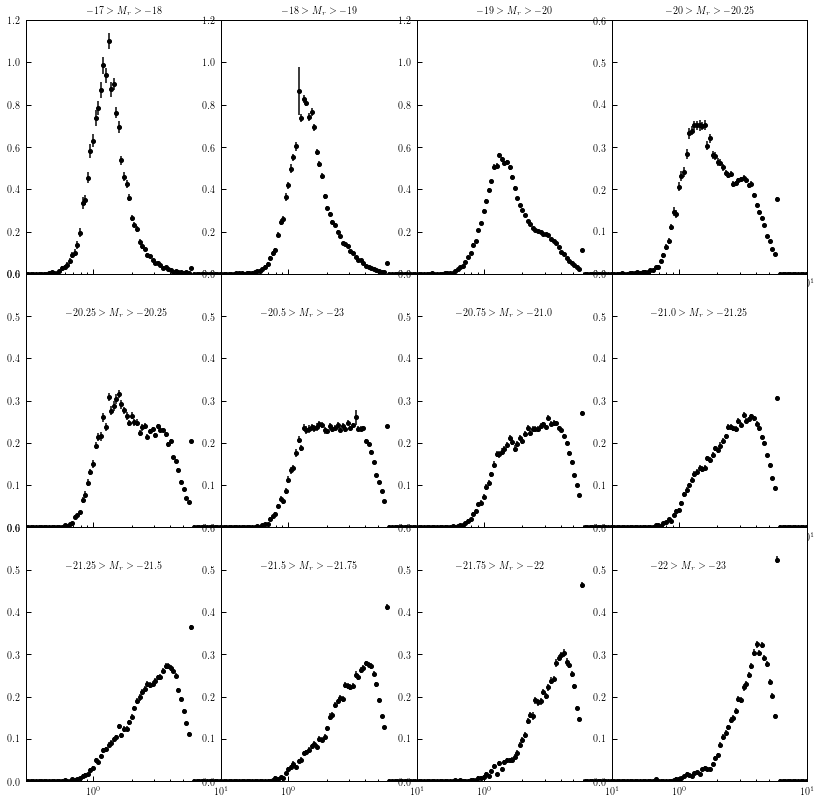

In [579]:
# row and column sharing
fig, axes = plt.subplots(3, 4, sharey=False, figsize=(14,14))
((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = axes
plt.subplots_adjust(wspace=0, hspace=0)

ax = ax1
t = t_1
ax1.set_title(r'$-17>M_r>-18$')
p1 = ax1.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax1.set_xlim([0.3,10])
ax1.set_ylim([0,1.2])
ax1.set_xscale('log')

ax = ax2
t = t_2
ax.set_title(r'$-18>M_r>-19$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])
ax.set_xscale('log')

ax = ax3
t = t_3
ax.set_title(r'$-19>M_r>-20$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])
ax.set_xscale('log')

ax = ax4
t = t_4
ax.set_title(r'$-20>M_r>-20.25$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax5
t = t_5
ax.text(0.6, 0.5, r'$-20.25>M_r>-20.25$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax6
t = t_6
ax.text(0.6, 0.5, r'$-20.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax7
t = t_7
ax.text(0.6, 0.5, r'$-20.75>M_r>-21.0$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax8
t = t_8
ax.text(0.6, 0.5, r'$-21.0>M_r>-21.25$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax9
t = t_9
ax.text(0.6, 0.5, r'$-21.25>M_r>-21.5$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax10
t = t_10
ax.text(0.6, 0.5, r'$-21.5>M_r>-21.75$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax11
t = t_11
ax.text(0.6, 0.5, r'$-21.75>M_r>-22$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

ax = ax12
t = t_12
ax.text(0.6, 0.5, r'$-22>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.6])
ax.set_xscale('log')

plt.show()



## double gaussian model

In [536]:
from scipy.stats import lognorm

def n_dist_model_2(theta):
    """
    """
    
    bins = np.logspace(-1,1,100)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    # extract parameters
    mu1, mu2, sigma1, sigma2, f = theta
    scale1 = mu1
    scale2 = mu2
    s1 = sigma1
    s2 = sigma2
    
    y1 = f*lognorm.cdf(bins, scale=scale1, s=s1)
    y2 = (1-f)*lognorm.cdf(bins, scale=scale2, s=s2)
    
    y1 = np.diff(y1)/np.diff(bins)
    y2 = np.diff(y2)/np.diff(bins)
    
    y = y1 + y2
    
    i=np.argmin(np.fabs(bins-5.9))-1
    mask =  bin_centers >= bin_centers[i]
    y[i] = np.sum(y[mask])
    y[i+1:]=0.0
    
    return y

def n_dist_model_2_pdf(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, sigma1, sigma2, f = theta
    scale1 = mu1
    scale2 = mu2
    s1 = sigma1
    s2 = sigma2
    
    y1 = f*lognorm.pdf(x, scale=scale1, s=s1)
    y2 = (1-f)*lognorm.pdf(x, scale=scale2, s=s2)
    
    y = y1 + y2
    
    return y

def n_dist_model_2a(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, sigma1, sigma2, f = theta
    scale1 = mu1
    scale2 = mu2
    s1 = sigma1
    s2 = sigma2
    
    y1 = f*lognorm.pdf(x, scale=scale1, s=s1)
    
    return y1

def n_dist_model_2b(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, sigma1, sigma2, f = theta
    scale1 = mu1
    scale2 = mu2
    s1 = sigma1
    s2 = sigma2
    
    y2 = (1-f)*lognorm.pdf(x, scale=scale2, s=s2)
    
    return y2

def chi2_2(theta, y, y_err):
    """
    """
    y_model = n_dist_model_2(theta)
    ls = (y-y_model)**2/y_err
    mask = y_err>0.0
    return np.sum(ls[mask])

In [570]:
theta1  = [1.4, 3.6, 0.3, 0.4, 0.95]
theta2  = [1.4, 3.6, 0.3, 0.4, 0.8]
theta3  = [1.4, 3.6, 0.3, 0.4, 0.7]
theta4  = [1.4, 3.6, 0.3, 0.4, 0.6]
theta5  = [1.4, 4.0, 0.3, 0.4, 0.5]
theta6  = [1.4, 4.6, 0.3, 0.4, 0.25]
theta7  = [1.4, 4.6, 0.3, 0.4, 0.2]
theta8  = [1.4, 4.6, 0.3, 0.4, 0.2]
theta9  = [1.4, 4.6, 0.3, 0.4, 0.1]
theta10 = [1.4, 4.6, 0.3, 0.4, 0.1]
theta11 = [1.4, 4.6, 0.3, 0.4, 0.1]
theta12 = [1.4, 4.6, 0.3, 0.4, 0.1]

In [571]:
from scipy.optimize import minimize
bounds=[(1,2.5),(2.5,5),(0.1,5),(0.1,5),(0.01,1.0)]

res1 = minimize(chi2_2, theta1, args=(t_1['frequency'],t_1['err']), bounds=bounds)
print(res1.success)
res2 = minimize(chi2_2, theta2, args=(t_2['frequency'],t_2['err']), bounds=bounds)
print(res2.success)
res3 = minimize(chi2_2, theta3, args=(t_3['frequency'],t_3['err']), bounds=bounds)
print(res3.success)
res4 = minimize(chi2_2, theta4, args=(t_4['frequency'],t_4['err']), bounds=bounds)
print(res4.success)
res5 = minimize(chi2_2, theta5, args=(t_5['frequency'],t_5['err']), bounds=bounds)
print(res5.success)
res6 = minimize(chi2_2, theta6, args=(t_6['frequency'],t_6['err']), bounds=bounds)
print(res6.success)
res7 = minimize(chi2_2, theta7, args=(t_7['frequency'],t_7['err']), bounds=bounds)
print(res7.success)
res8 = minimize(chi2_2, theta8, args=(t_8['frequency'],t_8['err']), bounds=bounds)
print(res8.success)
res9 = minimize(chi2_2, theta9, args=(t_9['frequency'],t_9['err']), bounds=bounds)
print(res9.success)
res10 = minimize(chi2_2, theta10, args=(t_10['frequency'],t_10['err']), bounds=bounds)
print(res10.success)
res11 = minimize(chi2_2, theta11, args=(t_11['frequency'],t_11['err']), bounds=bounds)
print(res11.success)
res12 = minimize(chi2_2, theta12, args=(t_12['frequency'],t_12['err']), bounds=bounds)
print(res12.success)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


True
True
True
True
True
True
True
True
True
True
True
True


In [572]:
print(res5.x)

[1.5920958  3.65997873 0.31238563 0.34009567 0.34370235]


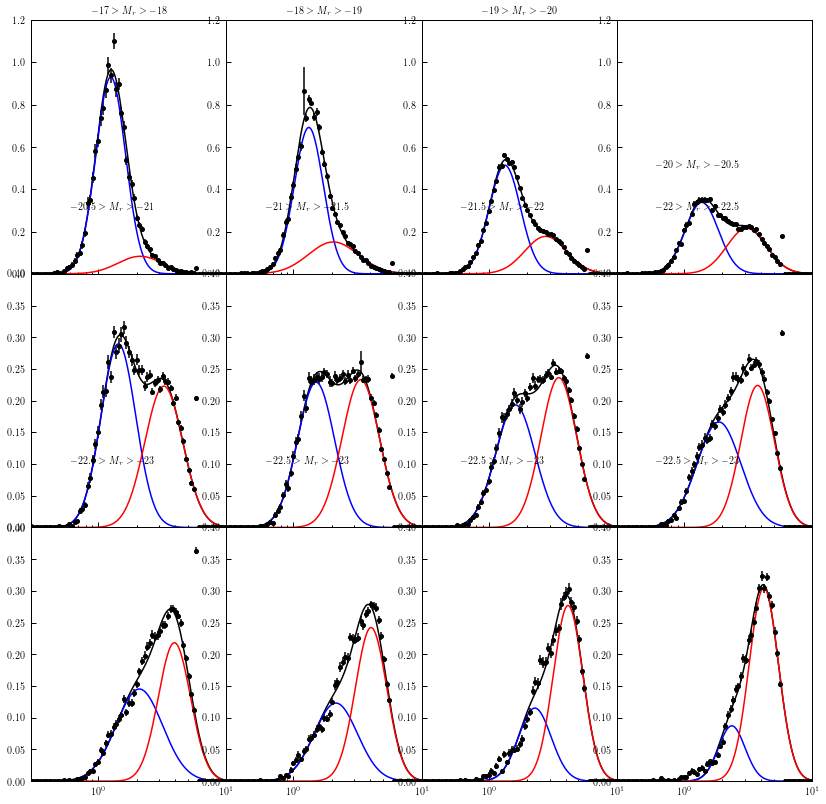

In [593]:
n_sample=np.logspace(-1,1,1000)

# row and column sharing
fig, axes = plt.subplots(3, 4, sharex=True, sharey=False, figsize=(14.0,14.0))
((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = axes
plt.subplots_adjust(wspace=0, hspace=0)

ax = ax1
theta = res1.x
t = t_1
ax1.set_title(r'$-17>M_r>-18$')
p1 = ax1.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax1.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax1.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax1.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax1.set_xlim([0.3,10])
ax1.set_ylim([0,1.2])

ax = ax2
theta = res2.x
t = t_2
ax2.set_title(r'$-18>M_r>-19$')
ax2.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax2.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax2.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax2.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax2.set_xlim([0.3,10])
ax2.set_ylim([0,1.2])

ax = ax3
theta = res3.x
t = t_3
ax3.set_title(r'$-19>M_r>-20$')
ax3.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax3.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax3.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax3.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax3.set_xlim([0.3,10])
ax3.set_ylim([0,1.2])

ax = ax4
theta = res4.x
t = t_4
ax4.text(0.6, 0.5, r'$-20>M_r>-20.5$')
ax4.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax4.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax4.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax4.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax4.set_xlim([0.3,10])
ax4.set_ylim([0,1.2])

ax = ax5
theta = res5.x
t = t_5
ax5.text(0.6, 0.5, r'$-20.5>M_r>-21$')
ax5.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax5.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax5.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax5.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax5.set_xlim([0.3,10])
ax5.set_ylim([0,0.4])

ax = ax6
theta = res6.x
t = t_6
ax6.text(0.6, 0.5, r'$-21>M_r>-21.5$')
ax6.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax6.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax6.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax6.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax6.set_xlim([0.3,10])
ax6.set_ylim([0,0.4])

ax = ax7
theta = res7.x
t = t_7
ax7.text(0.6, 0.5, r'$-21.5>M_r>-22$')
ax7.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax7.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax7.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax7.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax7.set_xlim([0.3,10])
ax7.set_ylim([0,0.4])

ax = ax8
theta = res8.x
t = t_8
ax.text(0.6, 0.5, r'$-22>M_r>-22.5$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax9
theta = res9.x
t = t_9
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax10
theta = res10.x
t = t_10
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax11
theta = res11.x
t = t_11
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax12
theta = res12.x
t = t_12
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_2_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_2a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_2b(theta, n_sample),'-', color='red')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax.set_xscale('log')

#ax.set_ylim([0.05,1.2])
#ax.set_yscale('log')


plt.show()

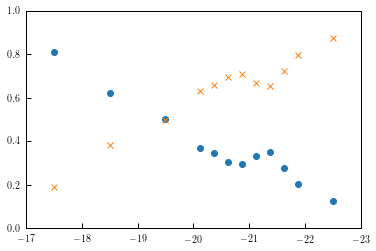

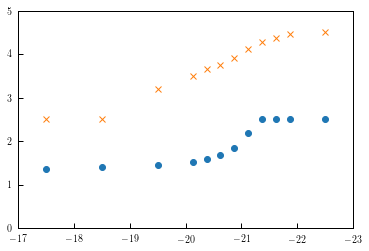

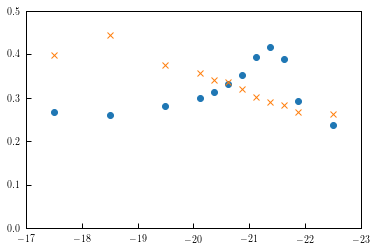

In [594]:
m1 = [res1.x[0],res2.x[0],res3.x[0],res4.x[0],
      res5.x[0],res6.x[0],res7.x[0],res8.x[0],
      res9.x[0],res10.x[0],res11.x[0],res12.x[0]]
m2 = [res1.x[1],res2.x[1],res3.x[1],res4.x[1],
      res5.x[1],res6.x[1],res7.x[1],res8.x[1],
      res9.x[1],res10.x[1],res11.x[1],res12.x[1]]
s1 = [res1.x[2],res2.x[2],res3.x[2],res4.x[2],
      res5.x[2],res6.x[2],res7.x[2],res8.x[2],
      res9.x[2],res10.x[2],res11.x[2],res12.x[2]]
s2 = [res1.x[3],res2.x[3],res3.x[3],res4.x[3],
      res5.x[3],res6.x[3],res7.x[3],res8.x[3],
      res9.x[3],res10.x[3],res11.x[3],res12.x[3]]
f = np.array([res1.x[-1],res2.x[-1],res3.x[-1],res4.x[-1],
              res5.x[-1],res6.x[-1],res7.x[-1],res8.x[-1],
              res9.x[-1],res10.x[-1],res11.x[-1],res12.x[-1]])

plt.figure()
plt.plot(mag_bin_centers, f, 'o')
plt.plot(mag_bin_centers, (1-f), 'x')
plt.ylim([0,1])
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(mag_bin_centers, m1, 'o')
plt.plot(mag_bin_centers, m2, 'x')
plt.ylim([0,5])
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(mag_bin_centers, s1, 'o')
plt.plot(mag_bin_centers, s2, 'x')
plt.ylim([0,0.5])
plt.xlim([-17,-23])
plt.show()

## triple gaussian fit

In [595]:
from scipy.stats import lognorm

def n_dist_model_3(theta):
    """
    """
    
    bins = np.logspace(-1,1,100)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    # extract parameters
    mu1, mu2, mu3, sigma1, sigma2, sigma3, f1, f2 = theta
    scale1 = mu1
    scale2 = mu2
    scale3 = mu3
    s1 = sigma1
    s2 = sigma2
    s3 = sigma3
    
    y1 = f2*f1*lognorm.cdf(bins, scale=scale1, s=s1)
    y2 = f2*(1-f1)*lognorm.cdf(bins, scale=scale2, s=s2)
    y3 = (1-f2)*lognorm.cdf(bins, scale=scale3, s=s3)
    
    y1 = np.diff(y1)/np.diff(bins)
    y2 = np.diff(y2)/np.diff(bins)
    y3 = np.diff(y3)/np.diff(bins)
    
    y = y1+y2+y3
    
    i=np.argmin(np.fabs(bins-5.9))-1
    mask =  bin_centers >= bin_centers[i]
    y[i] = np.sum(y[mask])
    y[i+1:]=0.0
    
    return y


def n_dist_model_3_pdf(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, mu3, sigma1, sigma2, sigma3, f1, f2 = theta
    scale1 = mu1
    scale2 = mu2
    scale3 = mu3
    s1 = sigma1
    s2 = sigma2
    s3 = sigma3
    
    y1 = f2*f1*lognorm.pdf(x, scale=scale1, s=s1)
    y2 = f2*(1-f1)*lognorm.pdf(x, scale=scale2, s=s2)
    y3 = (1-f2)*lognorm.pdf(x, scale=scale3, s=s3)
    
    y = y1 + y2 + y3
    
    return y

def n_dist_model_3a(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, mu3, sigma1, sigma2, sigma3, f1, f2 = theta
    scale1 = mu1
    scale2 = mu2
    scale3 = mu3
    s1 = sigma1
    s2 = sigma2
    s3 = sigma3
    
    y1 = f2*f1*lognorm.pdf(x, scale=scale1, s=s1)
    
    return y1

def n_dist_model_3b(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, mu3, sigma1, sigma2, sigma3, f1, f2 = theta
    scale1 = mu1
    scale2 = mu2
    scale3 = mu3
    s1 = sigma1
    s2 = sigma2
    s3 = sigma3
    
    y2 = f2*(1-f1)*lognorm.pdf(x, scale=scale2, s=s2)
    
    return y2


def n_dist_model_3c(theta, x):
    """
    """
    
    # extract parameters
    mu1, mu2, mu3, sigma1, sigma2, sigma3, f1, f2 = theta
    scale1 = mu1
    scale2 = mu2
    scale3 = mu3
    s1 = sigma1
    s2 = sigma2
    s3 = sigma3
    
    y3 = (1-f2)*lognorm.pdf(x, scale=scale3, s=s3)
    
    return y3

def chi2_3(theta, y, y_err):
    """
    """
    y_model = n_dist_model_3(theta)
    ls = (y-y_model)**2/y_err
    mask = y_err>0.0
    return np.sum(ls[mask])

In [668]:
theta1 = [1.4, 4.5, 1,
          0.3, 0.4, 0.15,
          0.4, 0.99]
theta2 = [1.4, 4.5, 1,
          0.3, 0.4, 0.15,
          0.4, 0.99]
theta3 = [1.4, 4.5, 1,
          0.3, 0.25, 0.15,
          0.4, 0.99]
theta4 = [1.5, 3.5, 2,
          0.3, 0.35, 0.1,
          0.35, 0.99]
theta5 = [1.4, 4.5, 2.8,
          0.3, 0.25, 0.15,
          0.4, 0.95]
theta6 = [1.4, 4.5, 2.8,
          0.3, 0.25, 0.15,
          0.4, 0.85]
theta7 = [1.4, 4.5, 2.8,
          0.3, 0.25, 0.15,
          0.15, 0.8]
theta8 = [1.4, 4.1, 3,
          0.3, 0.25, 0.25,
          0.05, 0.9]
theta9 = [1.4, 4.1, 3,
          0.3, 0.25, 0.15,
          0.05, 0.9]
theta10 = [1.4, 4.1, 3,
          0.3, 0.25, 0.15,
          0.05, 0.9]
theta11 = [1.4, 4.1, 3,
          0.3, 0.25, 0.15,
          0.05, 0.8]
theta12 = [1.4, 4.1, 3,
          0.3, 0.25, 0.15,
          0.05, 0.8]

bounds=[(1,2),(3,5),(1,2),
        (0.1,0.5),(0.1,0.8),(0.1,0.2),
        (0.01,1),(0.99,1.0)]
res1 = minimize(chi2_3, theta1, args=(t_1['frequency'],t_1['err']), bounds=bounds)
print(res1.success)
res2 = minimize(chi2_3, theta2, args=(t_2['frequency'],t_2['err']), bounds=bounds)
print(res2.success)
res3 = minimize(chi2_3, theta3, args=(t_3['frequency'],t_3['err']), bounds=bounds)
print(res3.success)
res4 = minimize(chi2_3, theta4, args=(t_4['frequency'],t_4['err']), bounds=bounds)
print(res4.success)

bounds=[(1,2),(3,5),(2,3),
        (0.1,0.5),(0.1,0.5),(0.1,0.2),
        (0.01,1),(0.95,1.0)]

res5 = minimize(chi2_3, theta5, args=(t_5['frequency'],t_5['err']), bounds=bounds)
print(res5.success)

bounds=[(1,2),(3,5),(2,3),
        (0.1,0.5),(0.1,0.5),(0.1,0.2),
        (0.01,1),(0.8,1.0)]

res6 = minimize(chi2_3, theta6, args=(t_6['frequency'],t_6['err']), bounds=bounds)
print(res6.success)


bounds=[(1,2),(2,5),(2,3),
        (0.1,0.5),(0.1,0.7),(0.1,0.2),
        (0.01,1),(0.01,1.0)]

res7 = minimize(chi2_3, theta7, args=(t_7['frequency'],t_7['err']), bounds=bounds)
print(res7.success)
res8 = minimize(chi2_3, theta8, args=(t_8['frequency'],t_8['err']), bounds=bounds)
print(res8.success)
res9 = minimize(chi2_3, theta9, args=(t_9['frequency'],t_9['err']), bounds=bounds)
print(res9.success)
res10 = minimize(chi2_3, theta10, args=(t_10['frequency'],t_10['err']), bounds=bounds)
print(res10.success)
res11 = minimize(chi2_3, theta11, args=(t_11['frequency'],t_11['err']), bounds=bounds)
print(res11.success)
res12 = minimize(chi2_3, theta12, args=(t_12['frequency'],t_12['err']), bounds=bounds)
print(res12.success)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in true_divide
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in true_divide


True
True
True
True
True
True
True
True
True
True
True
True


In [669]:
res4.x

array([1.48592535, 3.48970575, 2.        , 0.29241489, 0.35740122,
       0.11434923, 0.35422053, 0.99      ])

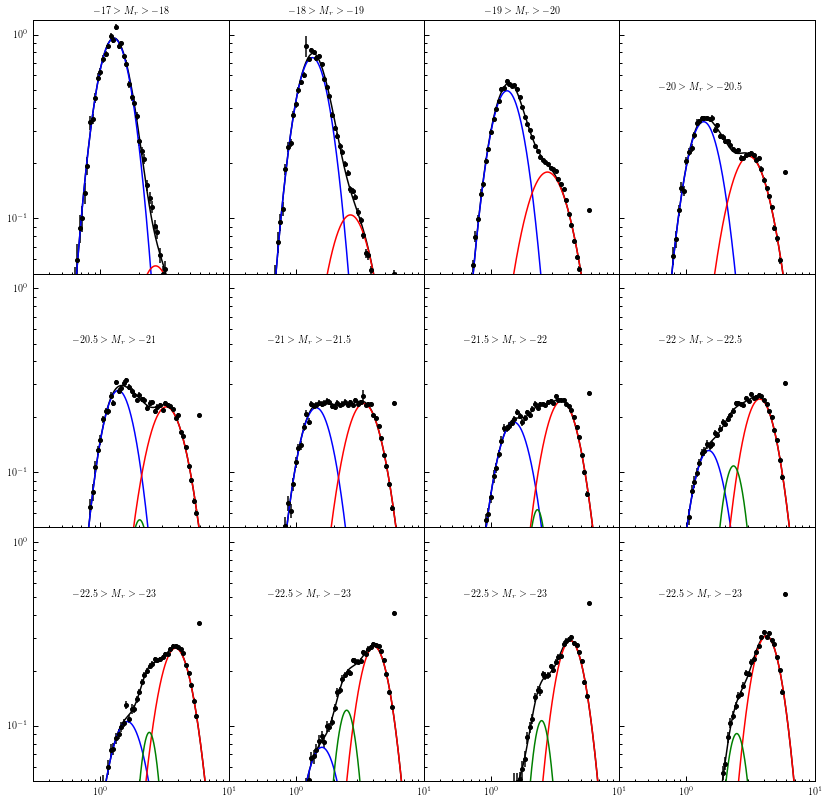

In [672]:
n_sample=np.logspace(-1,1,1000)

# row and column sharing
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(14.0,14.0))
((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = axes
plt.subplots_adjust(wspace=0, hspace=0)

ax = ax1
theta = res1.x
t = t_1
ax1.set_title(r'$-17>M_r>-18$')
p1 = ax1.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])

ax = ax2
theta = res2.x
t = t_2
ax.set_title(r'$-18>M_r>-19$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])

ax = ax3
theta = res3.x
t = t_3
ax.set_title(r'$-19>M_r>-20$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])

ax = ax4
theta = res4.x
t = t_4
ax.text(0.6, 0.5, r'$-20>M_r>-20.5$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,1.2])

ax = ax5
theta = res5.x
t = t_5
ax.text(0.6, 0.5, r'$-20.5>M_r>-21$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax6
theta = res6.x
t = t_6
ax.text(0.6, 0.5, r'$-21>M_r>-21.5$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax7
theta = res7.x
t = t_7
ax.text(0.6, 0.5, r'$-21.5>M_r>-22$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax8
theta = res8.x
t = t_8
ax.text(0.6, 0.5, r'$-22>M_r>-22.5$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax9
theta = res9.x
t = t_9
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax10
theta = res10.x
t = t_10
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax11
theta = res11.x
t = t_11
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax = ax12
theta = res12.x
t = t_12
ax.text(0.6, 0.5, r'$-22.5>M_r>-23$')
ax.errorbar(t['n'], t['frequency'], t['err'], fmt='o', color='black', ms=4)
ax.plot(n_sample,  n_dist_model_3_pdf(theta, n_sample),'-', color='black')
ax.plot(n_sample,  n_dist_model_3a(theta, n_sample),'-', color='blue')
ax.plot(n_sample,  n_dist_model_3b(theta, n_sample),'-', color='red')
ax.plot(n_sample,  n_dist_model_3c(theta, n_sample),'-', color='green')
ax.set_xlim([0.3,10])
ax.set_ylim([0,0.4])

ax.set_xscale('log')

ax.set_ylim([0.05,1.2])
ax.set_yscale('log')


plt.show()

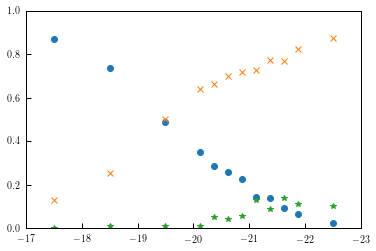

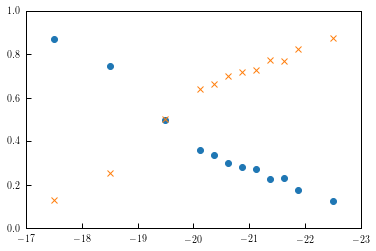

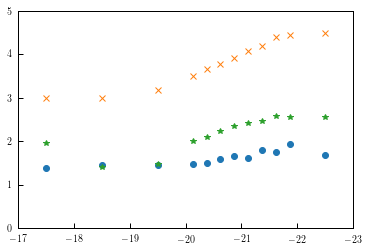

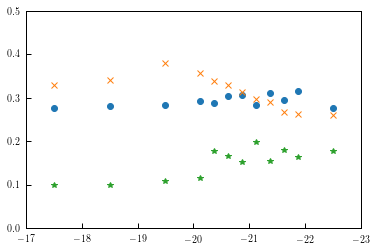

In [673]:
m1 = [res1.x[0],res2.x[0],res3.x[0],res4.x[0],
      res5.x[0],res6.x[0],res7.x[0],res8.x[0],
      res9.x[0],res10.x[0],res11.x[0],res12.x[0]]
m2 = [res1.x[1],res2.x[1],res3.x[1],res4.x[1],
      res5.x[1],res6.x[1],res7.x[1],res8.x[1],
      res9.x[1],res10.x[1],res11.x[1],res12.x[1]]
m3 = [res1.x[2],res2.x[2],res3.x[2],res4.x[2],
      res5.x[2],res6.x[2],res7.x[2],res8.x[2],
      res9.x[2],res10.x[2],res11.x[2],res12.x[2]]
s1 = [res1.x[3],res2.x[3],res3.x[3],res4.x[3],
      res5.x[3],res6.x[3],res7.x[3],res8.x[3],
      res9.x[3],res10.x[3],res11.x[3],res12.x[3]]
s2 = [res1.x[4],res2.x[4],res3.x[4],res4.x[4],
      res5.x[4],res6.x[4],res7.x[4],res8.x[4],
      res9.x[4],res10.x[4],res11.x[4],res12.x[4]]
s3 = [res1.x[5],res2.x[5],res3.x[5],res4.x[5],
      res5.x[5],res6.x[5],res7.x[5],res8.x[5],
      res9.x[5],res10.x[5],res11.x[5],res12.x[5]]
f1 = np.array([res1.x[-2],res2.x[-2],res3.x[-2],res4.x[-2],
               res5.x[-2],res6.x[-2],res7.x[-2],res8.x[-2],
               res9.x[-2],res10.x[-2],res11.x[-2],res12.x[-2]])
f2 = np.array([res1.x[-1],res2.x[-1],res3.x[-1],res4.x[-1],
               res5.x[-1],res6.x[-1],res7.x[-1],res8.x[-1],
               res9.x[-1],res10.x[-1],res11.x[-1],res12.x[-1]])

plt.figure()
plt.plot(mag_bin_centers,f2*f1, 'o')
plt.plot(mag_bin_centers,f2*(1-f1), 'x')
plt.plot(mag_bin_centers,(1-f2), '*')
plt.ylim([0,1])
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(mag_bin_centers,f2*f1+(1-f2), 'o')
plt.plot(mag_bin_centers,f2*(1-f1), 'x')
plt.ylim([0,1])
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(mag_bin_centers,m1, 'o')
plt.plot(mag_bin_centers,m2, 'x')
plt.plot(mag_bin_centers,m3, '*')
plt.ylim([0,5])
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(mag_bin_centers,s1, 'o')
plt.plot(mag_bin_centers,s2, 'x')
plt.plot(mag_bin_centers,s3, '*')
plt.ylim([0,0.5])
plt.xlim([-17,-23])
plt.show()